In [265]:
import numpy as np
import matplotlib.pyplot as plt

In [266]:
def jacobi_method(coefficients, constants, initial_guess, tolerance=1e-5, max_iterations=10000):
    n = len(coefficients)
    x = initial_guess.copy()
    errors = []
    for _ in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n-1):
            x_new[i] = (constants[i] - np.dot(coefficients[i][:i], x[:i]) - np.dot(coefficients[i][i+1:], x[i+1:])) / coefficients[i][i]
        x_new[n-1] = (constants[n-1] - np.dot(coefficients[n-1][:n-1], x[:n-1])) / coefficients[n-1][n-1]
        errors.append(np.linalg.norm(x_new - x))
        if errors[-1] < tolerance:
            break
        x = x_new
    return x, errors


In [267]:
def gauss_seidel_method(coefficients, constants, initial_guess, tolerance=1e-5, max_iterations=10000):
    n = len(coefficients)
    x = initial_guess.copy()
    errors = []
    for _ in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n-1):
            x_new[i] = (constants[i] - np.dot(coefficients[i][:i], x_new[:i]) - np.dot(coefficients[i][i+1:], x[i+1:])) / coefficients[i][i]
        x_new[n-1] = (constants[n-1] - np.dot(coefficients[n-1][:n-1], x_new[:n-1])) / coefficients[n-1][n-1]
        errors.append(np.linalg.norm(x_new - x))
        if errors[-1] < tolerance:
            break
        x = x_new
    return x, errors

In [268]:
# # Test problem
# coefficients = np.array([[2.412, 9.879, 1.564],
#                          [1.876, 2.985, -11.62],
#                          [12.214, 2.367, 3.672]])
# constants = np.array([4.89, -0.972, 7.814])
# initial_guess = np.array([3/7,6/7,2/7])

In [269]:
# Test problem
coefficients = np.array([[12.214, 2.367, 3.672],
                         [2.412, 9.879, 1.564],
                         [1.876, 2.985, -11.62]])
constants = np.array([ 7.814,4.89, -0.972])
initial_guess = np.array([0.5,0.1,0.4])

In [270]:
print(np.linalg.solve(coefficients,constants))

[0.5        0.33333333 0.25      ]


In [271]:
# Solve using Jacobi's method
jacobi_solution, jacobi_errors = jacobi_method(coefficients, constants, initial_guess)
print("Jacobi's Method Solution:", jacobi_solution)
print("Number of iterations for Jacobi's Method:", len(jacobi_errors))

# Solve using Gauss-Seidel method
gauss_seidel_solution, gauss_seidel_errors = gauss_seidel_method(coefficients, constants, initial_guess)
print("Gauss-Seidel Method Solution:", gauss_seidel_solution)
print("Number of iterations for Gauss-Seidel Method:", len(gauss_seidel_errors))


Jacobi's Method Solution: [0.50000283 0.3333334  0.25000509]
Number of iterations for Jacobi's Method: 10
Gauss-Seidel Method Solution: [0.49999846 0.33333283 0.24999962]
Number of iterations for Gauss-Seidel Method: 6


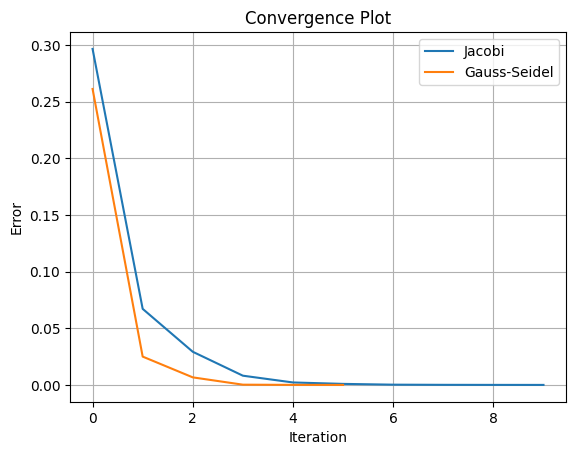

In [272]:
# Plot convergence
plt.plot(range(len(jacobi_errors)), jacobi_errors, label="Jacobi")
plt.plot(range(len(gauss_seidel_errors)), gauss_seidel_errors, label="Gauss-Seidel")
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Convergence Plot')
plt.legend()
plt.grid(True)
plt.show()

In [273]:
def generate_hilbert_matrix(n):
    H = np.zeros((n, n))
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            H[i - 1, j - 1] = 1 / (i + j - 1)
    print(H)
    return H

In [274]:
def generate_b(matrix):
    n = matrix.shape[0]
    return np.array([np.sum(matrix[i, :]) for i in range(n)])

In [275]:
def plot_convergence(jacobi_errors, gauss_seidel_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(jacobi_errors)), jacobi_errors, label="Jacobi")
    plt.plot(range(len(gauss_seidel_errors)), gauss_seidel_errors, label="Gauss-Seidel")
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Convergence Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]
Condition number of the generated Hilbert matrix: 524.0567775860627


C:\Users\Rishabh\AppData\Local\Temp\ipykernel_13772\3954920328.py:9: RuntimeWarning: overflow encountered in scalar divide
  x_new[n-1] = (constants[n-1] - np.dot(coefficients[n-1][:n-1], x[:n-1])) / coefficients[n-1][n-1]
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_13772\3954920328.py:10: RuntimeWarning: overflow encountered in subtract
  errors.append(np.linalg.norm(x_new - x))


Jacobi's Method Solution: [-inf -inf -inf]
Number of iterations for Jacobi's Method: 10000
Gauss-Seidel Method Solution: [0.99992558 1.00037981 0.99964927]
Number of iterations for Gauss-Seidel Method: 361


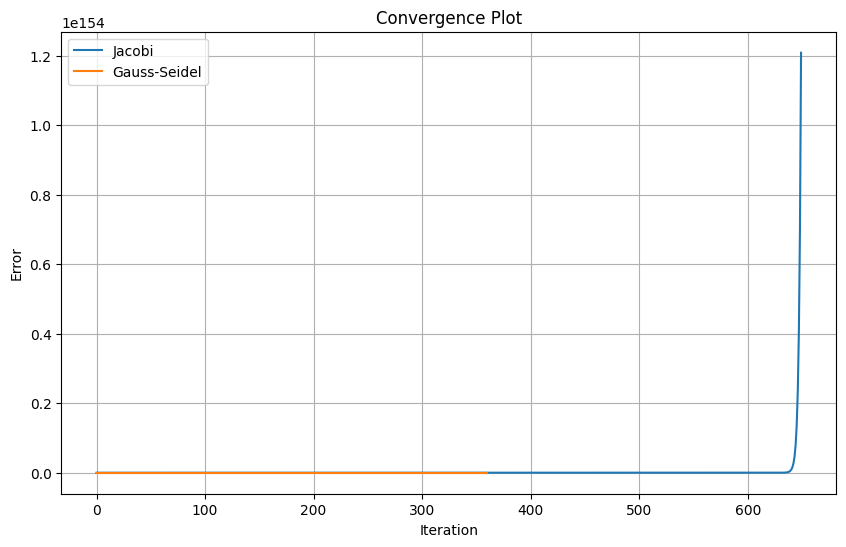

In [286]:
n = 3
hilbert_matrix = generate_hilbert_matrix(n)
condition_number = np.linalg.cond(hilbert_matrix)
print("Condition number of the generated Hilbert matrix:", condition_number)

b = generate_b(hilbert_matrix)

initial_guess = np.zeros(n)

# Solve using Jacobi's method
jacobi_solution, jacobi_errors = jacobi_method(hilbert_matrix, b, initial_guess)
print("Jacobi's Method Solution:", jacobi_solution)
print("Number of iterations for Jacobi's Method:", len(jacobi_errors))

# Solve using Gauss-Seidel method
gauss_seidel_solution, gauss_seidel_errors = gauss_seidel_method(hilbert_matrix, b, initial_guess)
print("Gauss-Seidel Method Solution:", gauss_seidel_solution)
print("Number of iterations for Gauss-Seidel Method:", len(gauss_seidel_errors))

# Plot convergence
plot_convergence(jacobi_errors, gauss_seidel_errors)

In [277]:
print(np.linalg.solve(hilbert_matrix,b))

[1. 1. 1.]


In [278]:
print(np.linalg.norm(hilbert_matrix,ord=2))
print(np.linalg.eigvals(hilbert_matrix))

1.408318927123654
[1.40831893 0.12232707 0.00268734]


In [279]:
A = np.array([[1.001, 1], [1, 1]])
b = np.array([1, 1])
b_prime = np.array([1.01, 0.99])
initial_guess=np.array([0.8,0.6])

In [280]:
jacobi_solution, jacobi_errors = jacobi_method(A, b, initial_guess)
print(jacobi_solution)
gauss_seidel_solution, gauss_seidel_errors = gauss_seidel_method(A, b, initial_guess)
print(gauss_seidel_solution)


[0.00540384 0.99729808]
[0.00707439 0.99292561]


In [281]:
jacobi_solution, jacobi_errors = jacobi_method(A, b_prime, initial_guess)
print(jacobi_solution)
gauss_seidel_solution, gauss_seidel_errors = gauss_seidel_method(A, b_prime, initial_guess)
print(gauss_seidel_solution)

[ 19.87030781 -18.87753834]
[ 19.99292365 -19.00292365]


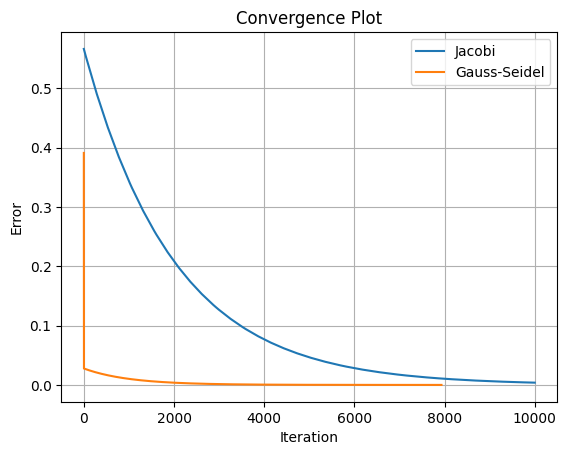

In [282]:
# Plot convergence
plt.plot(range(len(jacobi_errors)), jacobi_errors, label="Jacobi")
plt.plot(range(len(gauss_seidel_errors)), gauss_seidel_errors, label="Gauss-Seidel")
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Convergence Plot')
plt.legend()
plt.grid(True)
plt.show()

In [283]:
print(np.linalg.solve(A,b))
print(np.linalg.solve(A,b_prime))

[0. 1.]
[ 20.   -19.01]


In [284]:
print(np.linalg.cond(A))

4002.0007501260166
